In [34]:
# importing required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [35]:
# reading csv file
df=pd.read_csv('Downloads/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# checking for shape
df.shape

(768, 9)

In [5]:
# getting the statistical measures of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Outlier detection

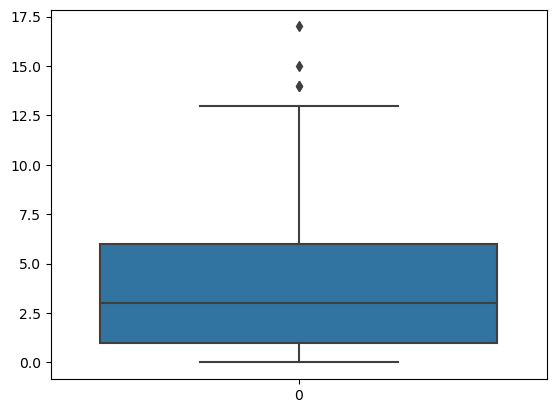

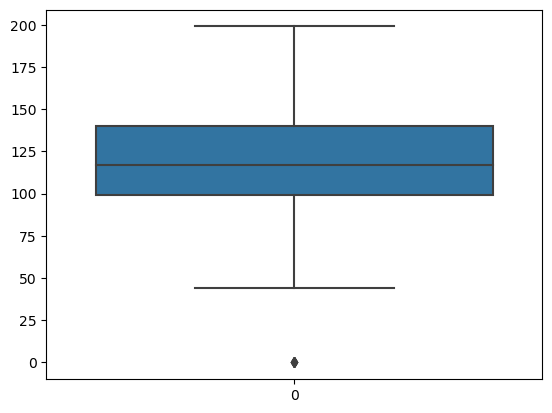

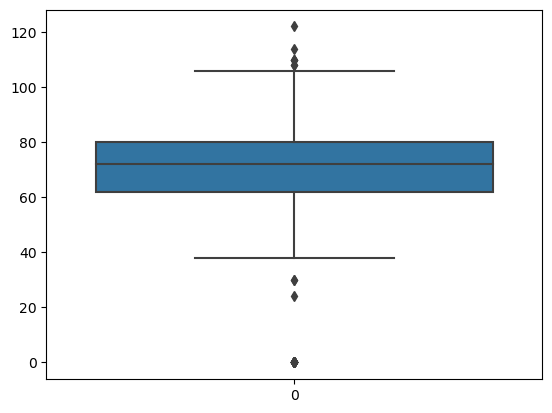

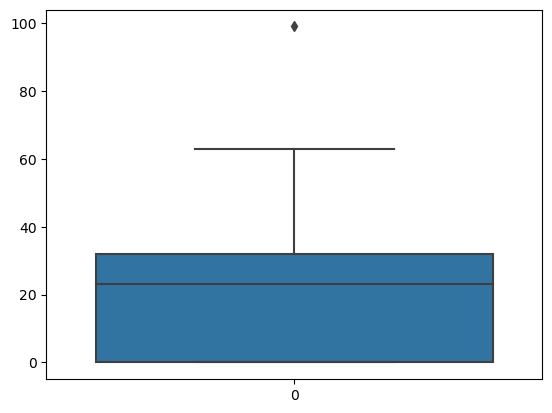

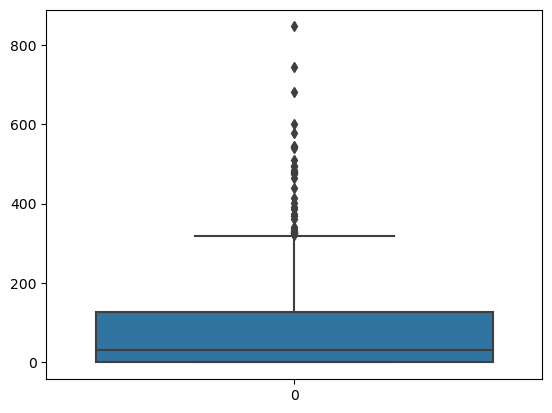

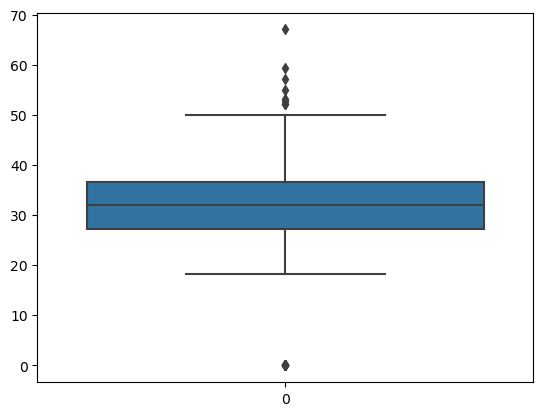

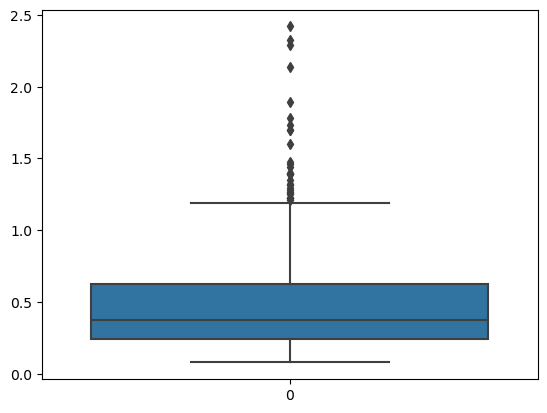

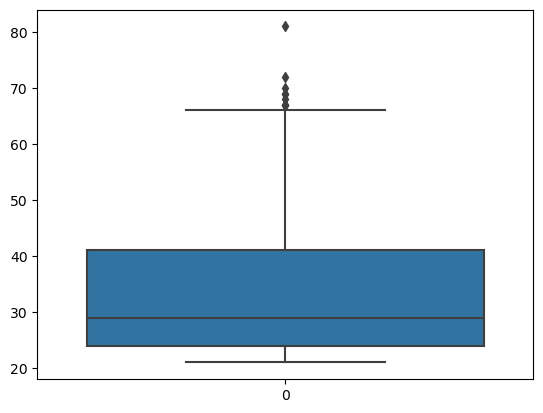

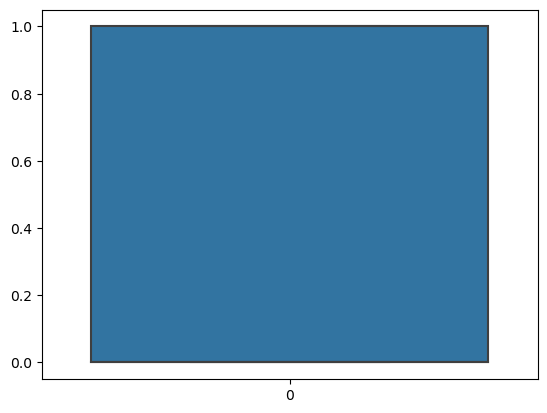

In [15]:
for i in df.columns:
    sns.boxplot(data=df[i])
    plt.show()

### Checking for duplicates

In [22]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Checking for Null values

In [23]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Imputing IQR values

In [24]:
lower=[]
upper=[]
for i in df.columns:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_bound=df[i].quantile(0.25)-(1.5*IQR)
    upper_bound=df[i].quantile(0.75)+(1.5*IQR)
    print(i,':',lower_bound,',',upper_bound)
    lower.append(lower_bound)
    upper.append(upper_bound)

Pregnancies : -6.5 , 13.5
Glucose : 37.125 , 202.125
BloodPressure : 35.0 , 107.0
SkinThickness : -48.0 , 80.0
Insulin : -190.875 , 318.125
BMI : 13.35 , 50.550000000000004
DiabetesPedigreeFunction : -0.32999999999999996 , 1.2
Age : -1.5 , 66.5
Outcome : -1.5 , 2.5


### Replacing outliers with IQR values

In [26]:
j=0
for i in df.columns:
    df.loc[df[i]>upper[j],i]=int(upper[j])
    j=j+1

In [27]:
k=0
for i in df.columns:
    df.loc[df[i]<lower[k],i]=int(lower[k])
    k=k+1

### plots after trating outliers

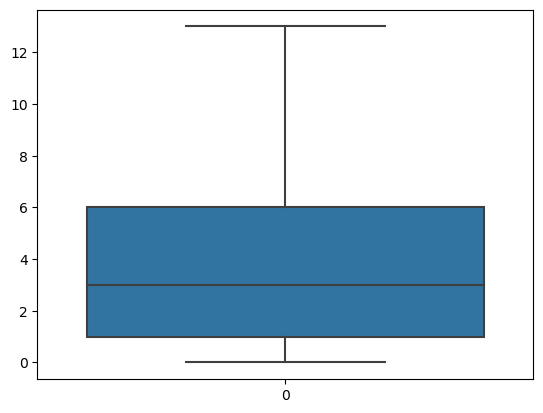

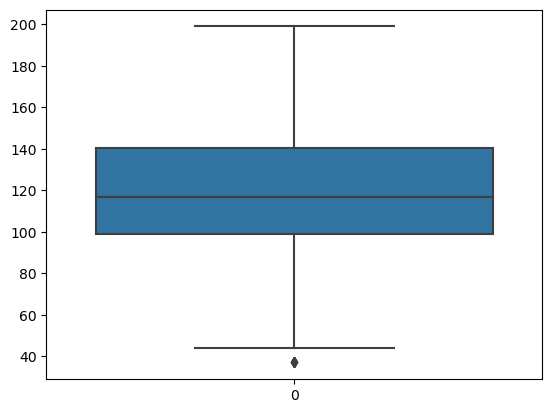

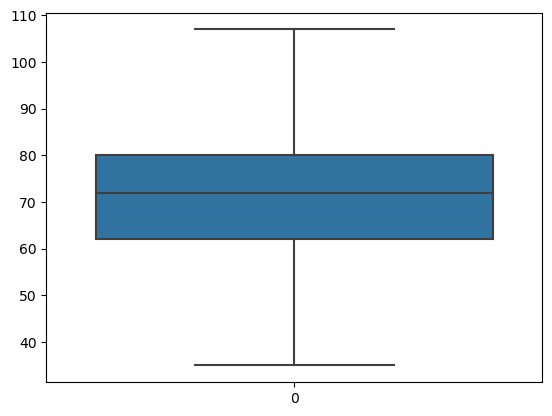

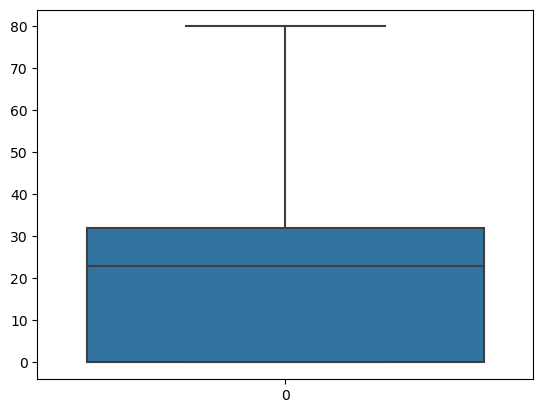

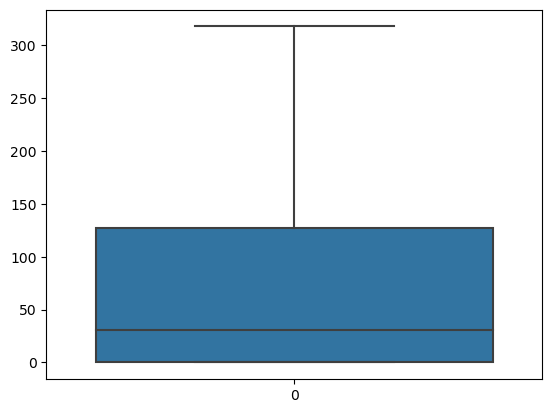

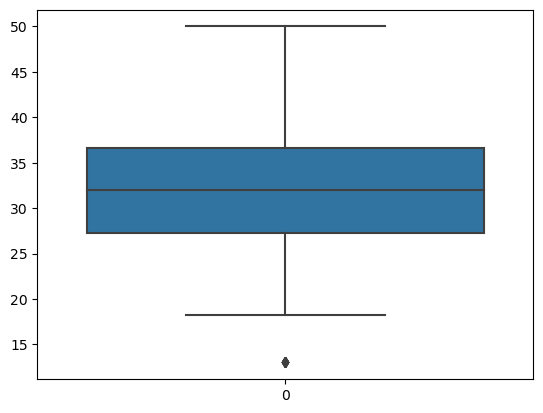

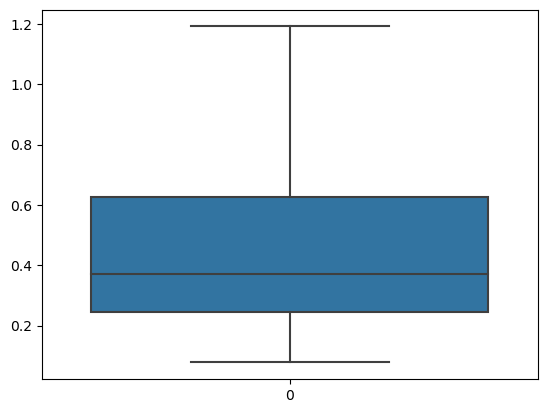

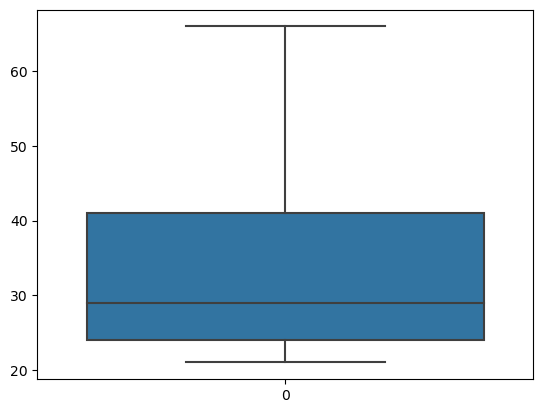

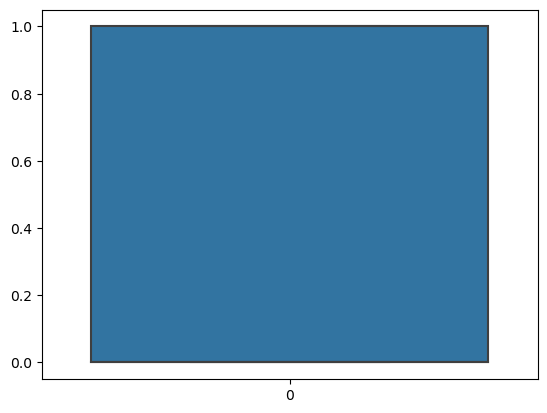

In [28]:
for i in df.columns:
    sns.boxplot(data=df[i])
    plt.show()

In [30]:
# separating the data and labels
X = df.drop(columns = 'Outcome', axis=1)
Y =df['Outcome']

In [31]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [32]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Train Test split

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [37]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


### Training the model

In [38]:
classifier = svm.SVC(kernel='linear')

In [39]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

## Model Evaluation

### Accuracy score

In [40]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [41]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7817589576547231


In [42]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [43]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7662337662337663


### Making predictive system

In [45]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


### Saving the model

In [50]:
import pickle

In [51]:
filename = 'trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [49]:
# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))